 <head>
  <meta charset="UTF-8">
  <meta name="description" content="Some calculations on singlet triplet qubits">
  <meta name="author" content="Andrea Hofmann">
</head> 

<nav>
  <ul> 
    <li><a href="#chapter0">Link to chapter 0: Load libraries, define define functions</a>
    <li>
        <a href="#chapter1">Link to chapter 1: Singlet-Triplet Qubit without spin-orbit interaction, without decoherence</a>
      <ul>
        <li><a href="#chapter1-1">Link to chapter 1.1: Out-of plane field</a></li>
        <li><a href="#chapter1-2">Link to chapter 1.2: In-plane field</a></li>
      </ul>
    </li>
    <li><a href="#chapter2">Link to chapter 2: Add spin-orbit interaction (in progress)</a></li>
     <ul>
         <li><a href="#chapter2-1">Link to chapter 2.1: Small spin-orbit interaction</a></li>
         <li><a href="#chapter2-2">Link to chapter 2.2: Play with SO</a></li>
     </ul>
  </ul>
</nav>


<a name="chapter0"></a>

# Load libaries, define functions


In [4]:
# IMPORT ALL LIBRARIES AND DEFINE THE PLOT STYLE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {"font.family": "serif"})

In [14]:
# DEFINE FUNCTIONS TO CALCULATE QUBIT ENERGIES AND EIGENENERGIES

def energies(d,B,c):
    # INPUT: d=detuning, B=Bfield, c=[g1,g2,tc,muB] the physical constants, takes only scalars
    # OUTPUT: energies of the qubit at the given settings, i.e. energies of the states S, T0, TM, TP
    
    g1=c[0]; g2=c[1]; tc=c[2]; muB=c[3]
    
    E_S = -np.sqrt(d**2 + 4*tc**2)
    E_T0 = d
    E_TP = E_T0+(g1+g2)*muB*B
    E_TM = E_T0-(g1+g2)*muB*B
    
    return E_S,E_T0,E_TP,E_TM

def eigen(d,B,c):
    # INPUT: d=detuning, B=Bfield, c=[g1,g2,tc,muB] the physical constants, takes only scalars
    # OUTPUT: eigenenergies of the system at the given settings, i.e. energies E0, E1, E2, E3
    so = 0 # ueV
    E_S,E_T0,E_TP,E_TM = energies(d,B,c)
    
    H = [
        [E_S,           (g1-g2)*muB*B, so,    so   ],
        [(g1-g2)*muB*B, E_T0,          0,    0   ],
        [so,             0,             E_TM, 0   ],
        [so,             0,             0,    E_TP]
    ]

    eig = np.linalg.eig(H)
    return eig

def Rabi(t,d,B,c):
    # INPUT: t=time, d=detuning, B=Bfield, c=[g1,g2,tc,muB] the physical constants: takes scalar or vector for t, scalars for all other quantities
    # OUTPUT: calculate the singlet return probability after a time t and at given energy-settings
    
    S = np.array([1,0,0,0]) # the singlet state is the unit vector [1,0,0,0] in the qubit space

    
    # calculate the eigenenergies and -vectors at the given setting
    eig = eigen(d,B,c)

    # psi is the singlet state in the new basis
    psi = np.dot(S.T,eig[1])

    # loop over t to calculate the singlet return probability for each instance of t in the given setting

    psi_t = []; pS=[]
    if t.shape == ():
        tau = t
        psi_tau = np.dot(np.diag(np.exp(-1j*eig[0]*tau/hbar)),psi) # time evolution: psi_t = e^(iHt/h)*psi
        psi_t.append(psi_tau)
        pS = np.abs(np.dot(psi_tau,psi))**2 # singlet probability: |<psi|psi_t>|^2
    
    else:
        for tau in t:
            psi_tau = np.dot(np.diag(np.exp(-1j*eig[0]*tau/hbar)),psi) # time evolution: psi_t = e^(iHt/h)*psi
            psi_t.append(psi_tau)
            pS.append(np.absolute(np.dot(psi_tau,psi))**2) # singlet probability: |<psi|psi_t>|^2
    return pS

# TO DO: change the functions so that also detuning and B-field can be vectors; this avoids looping below.

<a name="chapter1"></a>

# S-T0 Qubit without spin-orbit interaction

<a name="chapter1-1"></a>

## Out-of plane field

In [15]:
# DEFINE THE PHYSICAL CONSTANTS OF THE SYSTEM

# note: all energies are in eV; all other scales are in SI-units (B-fields in Tesla, time in s, etc)
g1 = 10
g2 = 9.3
tc = 5e-6 # eV; 20 ueV = 5 GHz
muB = 58e-6 # eV/T
hbar = 6.58e-10*1e-6 # eV*s

constants = [g1,g2,tc,muB]

At detuning =  9.999999999999999e-05 ueV, the singlet state in the new eigenbasis is: |S> = x|E0> + y|E1>
x =  -0.9999979498114266
y =  -0.0020249377629102385


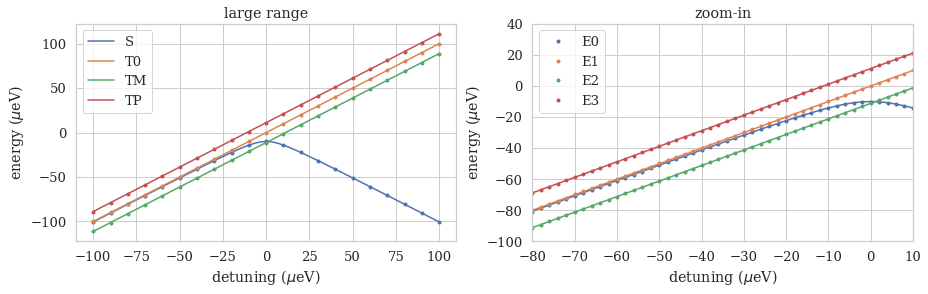

In [16]:
# INTRODUCING THE QUBIT: PLOT THE QUBIT ENERGIES AND THE EIGENENERGIES FOR VARIOUS VALUES OF DETUNING

# the settings to be used:
detuning = np.linspace(-100,100,101)*1e-6
Bfield = 10e-3 # T
E_S,E_T0,E_TP,E_TM = energies(d=detuning,B=Bfield,c=constants)


fig, ax = plt.subplots(1,2,figsize=(15,4))

# plot the qubit energies in both subplots
ax[0].plot(detuning*1e6,E_S*1e6,detuning*1e6,E_T0*1e6,detuning*1e6,E_TM*1e6,detuning*1e6,E_TP*1e6)
ax[1].plot(detuning*1e6,E_S*1e6,detuning*1e6,E_T0*1e6,detuning*1e6,E_TM*1e6,detuning*1e6,E_TP*1e6)

# calculate and plot the eigenenergies for each value of detuning 
for det in detuning:
    eig = eigen(d=det,B=Bfield,c=constants)
    
    ax[1].plot(det*1e6,eig[0][0]*1e6,'.',color='C0',label='E0')
    ax[1].plot(det*1e6,eig[0][1]*1e6,'.',color='C1',label='E1')
    ax[1].plot(det*1e6,eig[0][2]*1e6,'.',color='C2',label='E2')
    ax[1].plot(det*1e6,eig[0][3]*1e6,'.',color='C3',label='E3')
    
    if round(det*1e6)%5 == 0:
        ax[0].plot(det*1e6,eig[0][0]*1e6,'.',color='C0')
        ax[0].plot(det*1e6,eig[0][1]*1e6,'.',color='C1')
        ax[0].plot(det*1e6,eig[0][2]*1e6,'.',color='C2')
        ax[0].plot(det*1e6,eig[0][3]*1e6,'.',color='C3')

# label the figures
ax[1].set_xlim(-80,10)
ax[1].set_ylim(-100,40)

ax[0].title.set_text('large range')
ax[0].set_xlabel('detuning ($\mu$eV)')
ax[0].set_ylabel('energy ($\mu$eV)')

ax[1].title.set_text('zoom-in')
ax[1].set_xlabel('detuning ($\mu$eV)')
ax[1].set_ylabel('energy ($\mu$eV)')

handles, labels = ax[1].get_legend_handles_labels()
ax[0].legend(['S','T0','TM','TP'])
ax[1].legend(handles[:4],labels[:4])

S = np.array([1,0,0,0])
print('At detuning = ',det,'ueV, the singlet state in the new eigenbasis is: |S> = x|E0> + y|E1>')
print('x = ',np.dot(S.T,eig[1])[0])
print('y = ',np.dot(S.T,eig[1])[1])


__Note__: For the constants as chosen above (g1=10, g2=9.3, tc = 20 $\mu$eV), the Eigenenergies and Qubit-Energies are very similar! This means that we will not have access to the whole Bloch sphere. This effect is also visible from the Rabi oscillations below show.

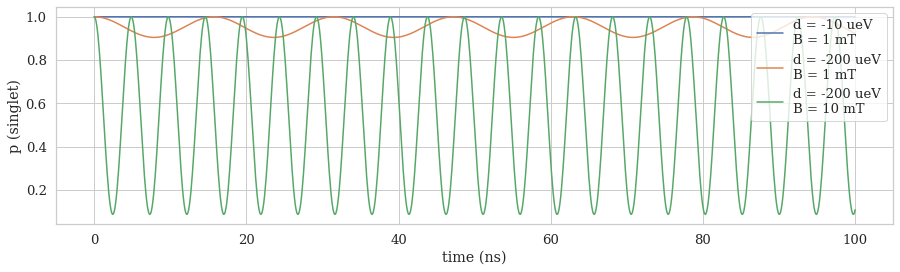

In [17]:
# RABI OSCILLATIONS: COMPARE OSCILLATION AMPLITUDES FOR VARIOUS SETTINGS

time = np.linspace(0,1e-7,1001) # in seconds

fig,ax = plt.subplots(1,figsize=(15,4))

# first setting:
detuning = -10e-6 #eV \omega = J/h = 
Bfield = 1e-3 #T
ax.plot(time*1e9,Rabi(time,d=detuning,B=Bfield,c=constants),label='d = -10 ueV\nB = 1 mT')

# second setting
detuning = -200e-6 #eV
Bfield = 1e-3 #T
ax.plot(time*1e9,Rabi(time,d=detuning,B=Bfield,c=constants),label='d = -200 ueV\nB = 1 mT')

# third setting
detuning = -200e-6 #eV
Bfield = 10e-3 #T
ax.plot(time*1e9,Rabi(time,d=detuning,B=Bfield,c=constants),label='d = -200 ueV\nB = 10 mT')

#ax.set_xlim(0,0.01)
ax.set_xlabel('time (ns)')
ax.set_ylabel('p (singlet)')

ax.legend(loc=1)

Text(0.5, 0, 'time (ns)')

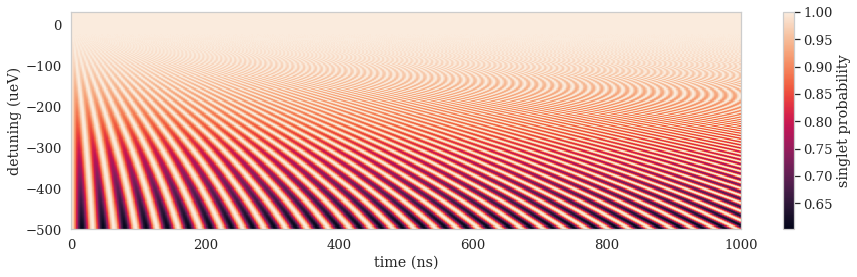

In [6]:
# RABI AT DIFFERENT VALUES OF DETUNING, FOR FIXED B-FIELD (1 mT)

pS_fin = []
time = np.linspace(0,1e-6,1001)
detuning = np.linspace(-500,30,201)*1e-6
Bfield=1e-3

for d in detuning:
    eig = eigen(d=d,B=Bfield,c=constants)
    pS_fin.append(Rabi(time,d=d,B=Bfield,c=constants))

fig,ax = plt.subplots(1,figsize=(15,4))
pic = ax.pcolormesh(time*1e9,detuning*1e6,np.array(pS_fin))
fig.colorbar(pic,label='singlet probability')
ax.set_ylabel('detuning (ueV)')
ax.set_xlabel('time (ns)')

__Note__:

__A)__ We see here that with the chosen settings, we need around $-500 \mu\textrm{eV}$ of detuning to get decent access to the whole Bloch sphere! This strongly depends on the value of the tunnel coupling!

__B)__ The back-bending at low detuning is an artifact (aliasing).

__C)__ This calculation looks a lot like Daniel's data with similar physical settings (we don't know the tunnel coupling and the lever arm)! Note, however, that the lowest singlet return probability is only about 60%. In order to get larger access to the Bloch sphere, larger detuning or B-field is required.

Text(0.5, 0, 'time (ns)')

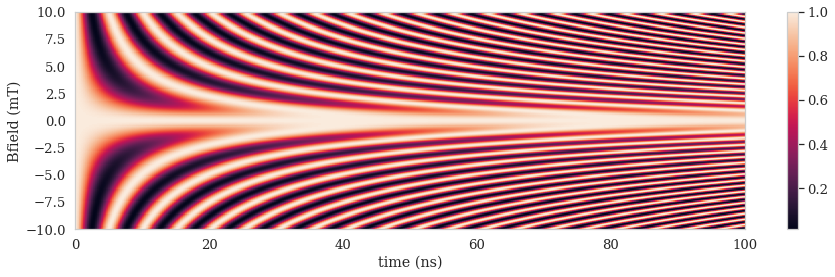

In [7]:
# RABI AT DIFFERENT VALUES OF B-FIELD, FOR FIXED DETUNING (-500 ueV)

constants = [g1,g2,tc,muB]

time = np.linspace(0,1e-7,1001)
detuning = -500e-6
Bfield = np.linspace(-10e-3,10e-3,201)

pS_fin = []
for B in Bfield:
    eig = eigen(d=detuning,B=B,c=constants)
    pS_fin.append(Rabi(time,d=detuning,B=B,c=constants))

pS_fin = np.array(pS_fin)

fig,ax = plt.subplots(1,figsize=(15,4))
pic = ax.pcolormesh(time*1e9,Bfield*1e3,pS_fin)
fig.colorbar(pic)
ax.set_ylabel('Bfield (mT)')
ax.set_xlabel('time (ns)')

__Note__:

This calculation looks very much like Daniel's measurements! We see that for $-500\mu\textrm{eV}$ of detuning, the out-of plane field needs to be around $5\textrm{mT}$ to get decent access to the Bloch sphere.

(-0.005, 0.005)

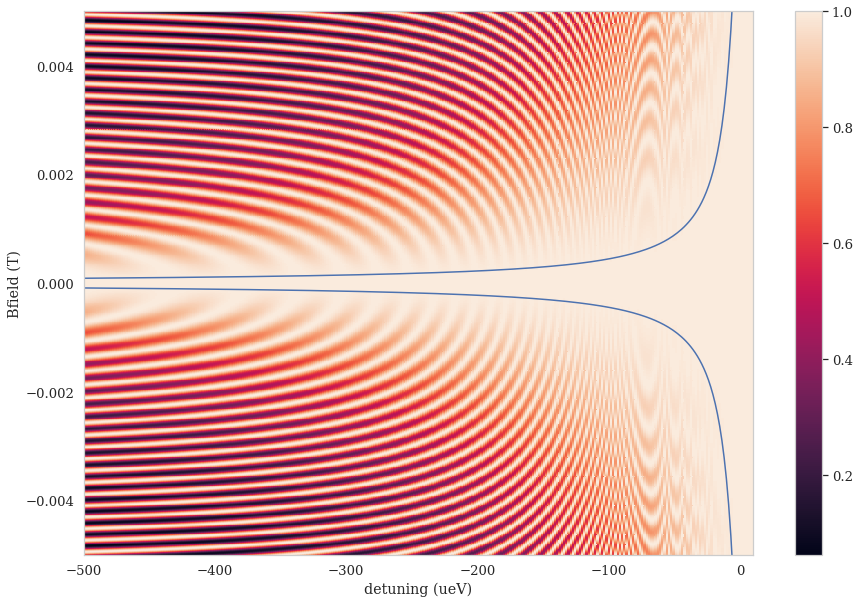

In [8]:
# FIX THE EVOLUTION TIME AND CHECK THE SINGLET RETURN PROBABILITY FOR VARIOUS VALUES OF B-FIELD AND DETUNING
# WE ALSO CALCULATE THE FUNNEL AND PLOT IT IN THE SAME GRAPH

constants = [g1,g1,tc,muB]
t=np.array(250e-9)

# big picture
pS_fin = []
Bfield = np.linspace(0,5e-3,301)
detuning = np.linspace(-500,10,301)*1e-6

# singlet return probability
for d in detuning:
    for B in Bfield:
        eig = eigen(d=d,B=B,c=constants)
        pS_fin.append(Rabi(t,d=d,B=B,c=constants))

pS_fin = np.array(pS_fin).reshape((len(detuning),len(Bfield)))

# having checked that it is indeed symmetric in B, we save calculation speed:
pS_fin_sym = np.concatenate((pS_fin.T[::-1], pS_fin.T))
Bfield_sym = np.concatenate((Bfield[::-1],-Bfield))

fig,ax = plt.subplots(1,figsize=(15,10))
pic = ax.pcolormesh(detuning*1e6,Bfield_sym,pS_fin_sym)
fig.colorbar(pic,ax=ax)

# funnel
E_S, E_T0,x,x = energies(d=detuning,B=0,c=constants) # B doesn't matter; we are only interested in E_S, E_T0
J = (E_T0 - E_S)
ax.plot(detuning*1e6,J/(g1*muB+g2*muB),color='C0')
ax.plot(detuning*1e6,-J/(g1*muB+g2*muB),color='C0')

ax.set_xlabel('detuning (ueV)')
ax.set_ylabel('Bfield (T)')
ax.set_ylim(-np.max(Bfield),np.max(Bfield))


__Note__:

__A)__ Features appear at low values of detuning; they are again due to aliasing (I checked by zooming-in with high resolution)

__B)__ These features are different to those that Daniel sees in his measurements (in the measurement, they tend to bend backwards)

__C)__ Otherwise again, nice agreement to the data.

<a name="chapter1-2"></a>

## In-plane field

In [9]:
# DEFINE THE PHYSICAL CONSTANTS OF THE SYSTEM
# To go from out-of plane to in-plane, in the simle approach, we just need to change the values of g1,g2.
# Assume that the relative g-factor difference is constant, i.e. about 7%.
# Having now \Delta_g = 0.03 instead of 0.3, I expect the B-field dependence to scale with a factor of 10.

# note: all energies are in eV; all other scales are in SI-units (B-fields in Tesla, time in s, etc)
g1 = 0.4
g2 = 0.37
tc = 5e-6 # eV; 20 ueV = 5 GHz
muB = 58e-6 # eV/T
hbar = 6.58e-10*1e-6 # eV*s

constants = [g1,g2,tc,muB]

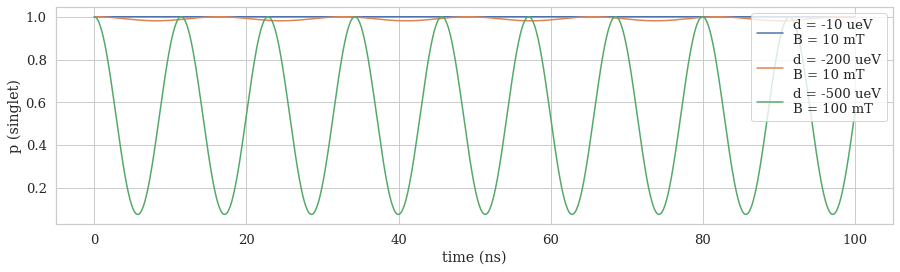

In [10]:
# RABI OSCILLATIONS: COMPARE OSCILLATION AMPLITUDES FOR VARIOUS SETTINGS

time = np.linspace(0,1e-7,1001) # in seconds

fig,ax = plt.subplots(1,figsize=(15,4))

# first setting:
detuning = -10e-6 #eV \omega = J/h = 
Bfield = 10e-3 #T
ax.plot(time*1e9,Rabi(time,d=detuning,B=Bfield,c=constants),label='d = -10 ueV\nB = 10 mT')

# second setting
detuning = -200e-6 #eV
Bfield = 10e-3 #T
ax.plot(time*1e9,Rabi(time,d=detuning,B=Bfield,c=constants),label='d = -200 ueV\nB = 10 mT')

# third setting
detuning = -500e-6 #eV
Bfield = 100e-3 #T
ax.plot(time*1e9,Rabi(time,d=detuning,B=Bfield,c=constants),label='d = -500 ueV\nB = 100 mT')

#ax.set_xlim(0,0.01)
ax.set_xlabel('time (ns)')
ax.set_ylabel('p (singlet)')

ax.legend(loc=1)

__Note__: Due to the small g-factors, these oscillations are calculated with 10x increased magnetic field as compared to the out-of plane direction. For decent oscillations at $B=100\textrm{mT}$, the detuning should be around $-500\mu\textrm{eV}$

Text(0.5, 0, 'time (ns)')

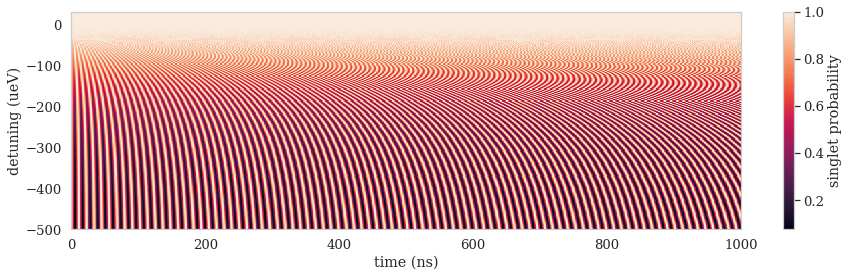

In [11]:
# RABI AT DIFFERENT VALUES OF DETUNING, FOR FIXED B-FIELD (100 mT)

pS_fin = []
time = np.linspace(0,1e-6,1001)
detuning = np.linspace(-500,30,201)*1e-6
Bfield=100e-3

for d in detuning:
    eig = eigen(d=d,B=Bfield,c=constants)
    pS_fin.append(Rabi(time,d=d,B=Bfield,c=constants))

fig,ax = plt.subplots(1,figsize=(15,4))
pic = ax.pcolormesh(time*1e9,detuning*1e6,np.array(pS_fin))
fig.colorbar(pic,label='singlet probability')
ax.set_ylabel('detuning (ueV)')
ax.set_xlabel('time (ns)')

__Note__: To get high enough singlet return probability, we have to increase the B-field to $100\textrm{mT}$.
(For the same plot with out-of-plane field, I used $1\textrm{mT}$)

Text(0.5, 0, 'time (ns)')

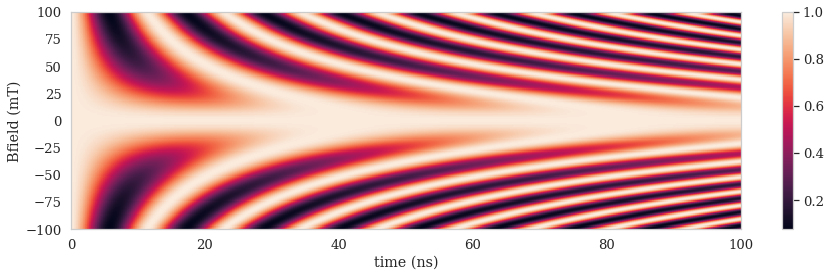

In [12]:
# RABI AT DIFFERENT VALUES OF B-FIELD, FOR FIXED DETUNING (-500 ueV)

constants = [g1,g2,tc,muB]

time = np.linspace(0,1e-7,1001)
detuning = -500e-6
Bfield = np.linspace(-100e-3,100e-3,201)

pS_fin = []
for B in Bfield:
    eig = eigen(d=detuning,B=B,c=constants)
    pS_fin.append(Rabi(time,d=detuning,B=B,c=constants))

pS_fin = np.array(pS_fin)

fig,ax = plt.subplots(1,figsize=(15,4))
pic = ax.pcolormesh(time*1e9,Bfield*1e3,pS_fin)
fig.colorbar(pic)
ax.set_ylabel('Bfield (mT)')
ax.set_xlabel('time (ns)')

(-0.05, 0.05)

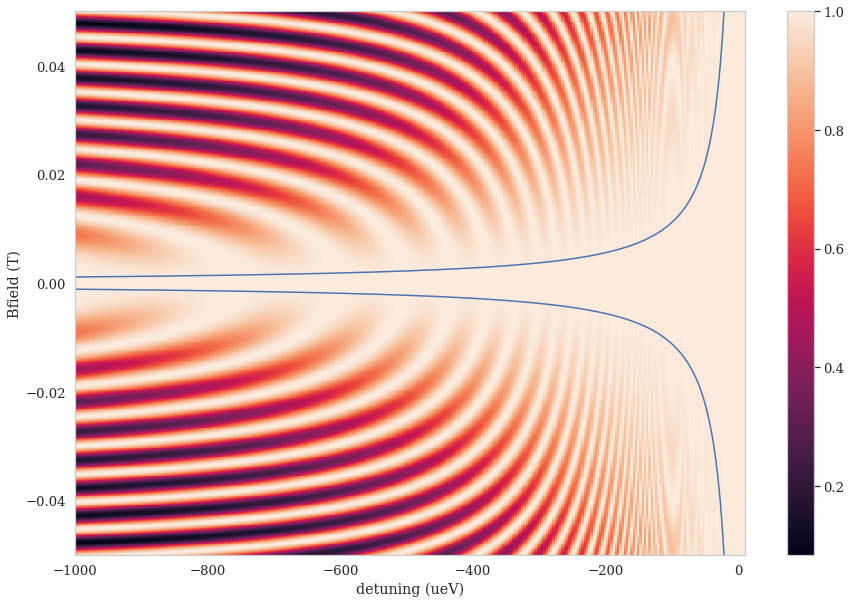

In [13]:
# FIX THE EVOLUTION TIME AND CHECK THE SINGLET RETURN PROBABILITY FOR VARIOUS VALUES OF B-FIELD AND DETUNING
# WE ALSO CALCULATE THE FUNNEL AND PLOT IT IN THE SAME GRAPH

t=np.array(250e-9)

# big picture
pS_fin = []
Bfield = np.linspace(0,50e-3,301)
detuning = np.linspace(-1000,10,301)*1e-6

# singlet return probability
for d in detuning:
    for B in Bfield:
        eig = eigen(d=d,B=B,c=constants)
        pS_fin.append(Rabi(t,d=d,B=B,c=constants))

pS_fin = np.array(pS_fin).reshape((len(detuning),len(Bfield)))

# having checked that it is indeed symmetric in B, we save calculation speed:
pS_fin_sym = np.concatenate((pS_fin.T[::-1], pS_fin.T))
Bfield_sym = np.concatenate((Bfield[::-1],-Bfield))

fig,ax = plt.subplots(1,figsize=(15,10))
pic = ax.pcolormesh(detuning*1e6,Bfield_sym,pS_fin_sym)
fig.colorbar(pic,ax=ax)

# funnel
E_S, E_T0,x,x = energies(d=detuning,B=0,c=constants) # B doesn't matter; we are only interested in E_S, E_T0
J = (E_T0 - E_S)
ax.plot(detuning*1e6,J/(g1*muB+g2*muB),color='C0')
ax.plot(detuning*1e6,-J/(g1*muB+g2*muB),color='C0')

ax.set_xlabel('detuning (ueV)')
ax.set_ylabel('Bfield (T)')
ax.set_ylim(-np.max(Bfield),np.max(Bfield))


<a name="chapter2"></a>

# Add spin-orbit interaction

So far, there was no spin-orbit interaction at all. Hence, no mixing between S and TM or TP, and therefore no anticrossing. Now, I am adding a small perturbation.

Use the example of out-of-plane field (i.e. large g-factors).

In [14]:
# NEW EIGENVALUE FUNCTION ALLOWING FOR SPIN--ORBIT INTERACTION
# the new funciton is compatible with the old one (default spin--orbit interaction set to zero)

def energies(d,B,c):
    # INPUT: d=detuning, B=Bfield, c=[g1,g2,tc,muB] the physical constants, takes only scalars
    # OUTPUT: energies of the qubit at the given settings, i.e. energies of the states S, T0, TM, TP
    
    g1=c[0]; g2=c[1]; tc=c[2]; muB=c[3]
    
    E_S = -np.sqrt(d**2 + 4*tc**2)
    E_T0 = d
    E_TP = E_T0+(g1+g2)*muB*B
    E_TM = E_T0-(g1+g2)*muB*B
    
    return E_S,E_T0,E_TP,E_TM

def eigen(d,B,c,so=0):
    # INPUT: d=detuning, B=Bfield, c=[g1,g2,tc,muB] the physical constants, takes only scalars
    # OUTPUT: eigenenergies of the system at the given settings, i.e. energies E0, E1, E2, E3
    so = so # eV
    E_S,E_T0,E_TP,E_TM = energies(d,B,c)
    
    H = [
        [E_S,           (g1-g2)*muB*B, so,    so   ],
        [(g1-g2)*muB*B, E_T0,          0,    0   ],
        [so,             0,             E_TM, 0   ],
        [so,             0,             0,    E_TP]
    ]

    eig = np.linalg.eig(H)    
    return eig

def Rabi(t,d,B,c,so=0):
    # INPUT: t=time, d=detuning, B=Bfield, c=[g1,g2,tc,muB] the physical constants: takes scalar or vector for t, scalars for all other quantities
    # OUTPUT: calculate the singlet return probability after a time t and at given energy-settings
    
    S = np.array([1,0,0,0]) # the singlet state is the unit vector [1,0,0,0] in the qubit space

    
    # calculate the eigenenergies and -vectors at the given setting
    eig = eigen(d,B,c,so=so)

    # psi is the singlet state in the new basis
    psi = np.dot(S.T,eig[1])

    # loop over t to calculate the singlet return probability for each instance of t in the given setting

    psi_t = []; pS=[]
    if t.shape == ():
        tau = t
        psi_tau = np.dot(np.diag(np.exp(-1j*eig[0]*tau/hbar)),psi) # time evolution: psi_t = e^(iHt/h)*psi
        psi_t.append(psi_tau)
        pS = np.abs(np.dot(psi_tau,psi))**2 # singlet probability: |<psi|psi_t>|^2
    
    else:
        for tau in t:
            psi_tau = np.dot(np.diag(np.exp(-1j*eig[0]*tau/hbar)),psi) # time evolution: psi_t = e^(iHt/h)*psi
            psi_t.append(psi_tau)
            pS.append(np.abs(np.dot(psi_tau,psi))**2) # singlet probability: |<psi|psi_t>|^2
    return pS

# TO DO: change the functions so that also detuning and B-field can be vectors; this avoids looping below.

In [15]:
# DEFINE THE PHYSICAL CONSTANTS OF THE SYSTEM

# note: all energies are in eV; all other scales are in SI-units (B-fields in Tesla, time in s, etc)
g1 = 10
g2 = 9.3
tc = 5e-6 # eV; 20 ueV = 5 GHz
muB = 58e-6 # eV/T
hbar = 6.58e-10*1e-6 # eV*s

constants = [g1,g2,tc,muB]

At detuning =  9.999999999999999e-05 ueV, the singlet state in the new eigenbasis is: |S> = x|E0> + y|E1>
x =  -0.9999728442445855
y =  0.004724994119242489


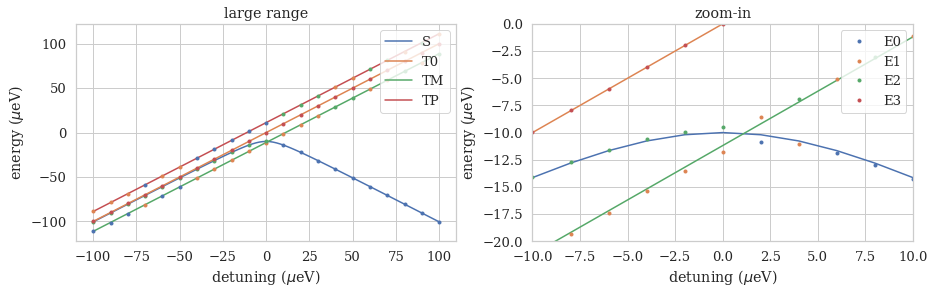

In [16]:
# INTRODUCING THE QUBIT: PLOT THE QUBIT ENERGIES AND THE EIGENENERGIES FOR VARIOUS VALUES OF DETUNING

# the settings to be used:

so = 1e-6 # eV; rather large, so that we see the influence

detuning = np.linspace(-100,100,101)*1e-6
Bfield = 10e-3 # T
E_S,E_T0,E_TP,E_TM = energies(d=detuning,B=Bfield,c=constants)


fig, ax = plt.subplots(1,2,figsize=(15,4))

# plot the qubit energies in both subplots
ax[0].plot(detuning*1e6,E_S*1e6,detuning*1e6,E_T0*1e6,detuning*1e6,E_TM*1e6,detuning*1e6,E_TP*1e6)
ax[1].plot(detuning*1e6,E_S*1e6,detuning*1e6,E_T0*1e6,detuning*1e6,E_TM*1e6,detuning*1e6,E_TP*1e6)

# calculate and plot the eigenenergies for each value of detuning 
for det in detuning:
    eig = eigen(d=det,B=Bfield,c=constants,so=so)
    
    ax[1].plot(det*1e6,eig[0][0]*1e6,'.',color='C0',label='E0')
    ax[1].plot(det*1e6,eig[0][1]*1e6,'.',color='C1',label='E1')
    ax[1].plot(det*1e6,eig[0][2]*1e6,'.',color='C2',label='E2')
    ax[1].plot(det*1e6,eig[0][3]*1e6,'.',color='C3',label='E3')
    
    if round(det*1e6)%5 == 0:
        ax[0].plot(det*1e6,eig[0][0]*1e6,'.',color='C0')
        ax[0].plot(det*1e6,eig[0][1]*1e6,'.',color='C1')
        ax[0].plot(det*1e6,eig[0][2]*1e6,'.',color='C2')
        ax[0].plot(det*1e6,eig[0][3]*1e6,'.',color='C3')

# label the figures
ax[0].title.set_text('large range')
ax[0].set_xlabel('detuning ($\mu$eV)')
ax[0].set_ylabel('energy ($\mu$eV)')

ax[1].title.set_text('zoom-in')
ax[1].set_xlabel('detuning ($\mu$eV)')
ax[1].set_ylabel('energy ($\mu$eV)')

ax[1].set_xlim(-10,10)
ax[1].set_ylim(-20,0)


handles, labels = ax[1].get_legend_handles_labels()
ax[0].legend(['S','T0','TM','TP'],loc=1)
ax[1].legend(handles[:4],labels[:4],loc=1)

S = np.array([1,0,0,0])
print('At detuning = ',det,'ueV, the singlet state in the new eigenbasis is: |S> = x|E0> + y|E1>')
print('x = ',np.dot(S.T,eig[1])[0])
print('y = ',np.dot(S.T,eig[1])[1])


__Note__: We see that the S and TM state anticross; and that the qubit energies are not anymore the eigenenergies of the system. Here, I used $E_{SO} = 1 \mu\textrm{eV}$, so that the anticrossing becomes nicely visible.

<a name="chapter2-1"></a>

## Small SOI

In this chapter, the spin-orbit energy is fixed to $E_{SO} = 10\textrm{neV}$. Just as a check to see how the funnel appears due to the anticrossing.

In [17]:
so = 1e-8 # eV

Text(0.5, 0, 'time (ns)')

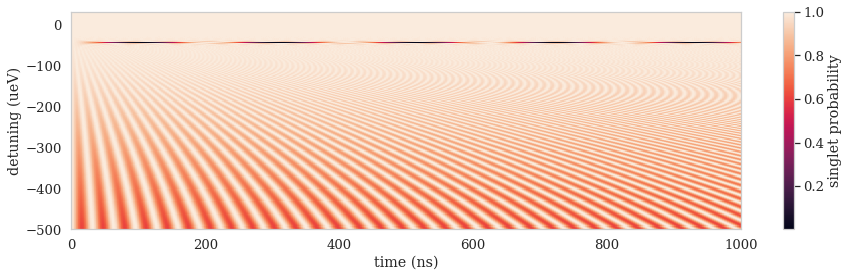

In [18]:
# RABI AT DIFFERENT VALUES OF DETUNING, FOR FIXED B-FIELD (1 mT)

pS_fin = []
time = np.linspace(0,1e-6,1001)
detuning = np.linspace(-500,30,201)*1e-6
Bfield=1e-3

for d in detuning:
    pS_fin.append(Rabi(time,d=d,B=Bfield,c=constants,so=so))

fig,ax = plt.subplots(1,figsize=(15,4))
pic = ax.pcolormesh(time*1e9,detuning*1e6,np.array(pS_fin))
fig.colorbar(pic,label='singlet probability')
ax.set_ylabel('detuning (ueV)')
ax.set_xlabel('time (ns)')

__Note__: The plot does not change at detunings beyond the S-TM crossing (we had only 65% singlet return probability also before). However, the S-TM qubit seems to give large access to the bloch-sphere. This is not unexpected, since the energy of the singlet qubit state at the anticrossing lies exactly in-between the two eigenstates of the system.

Text(0.5, 0, 'time (ns)')

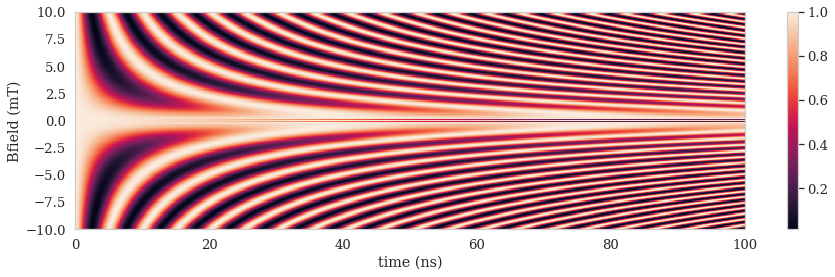

In [19]:
# RABI AT DIFFERENT VALUES OF B-FIELD, FOR FIXED DETUNING (-500 ueV)

constants = [g1,g2,tc,muB]

time = np.linspace(0,1e-7,1001)
detuning = -500e-6
Bfield = np.linspace(-10e-3,10e-3,201)

pS_fin = []
for B in Bfield:
    pS_fin.append(Rabi(time,d=detuning,B=B,c=constants,so=1e-8))

pS_fin = np.array(pS_fin)

fig,ax = plt.subplots(1,figsize=(15,4))
pic = ax.pcolormesh(time*1e9,Bfield*1e3,pS_fin)
fig.colorbar(pic)
ax.set_ylabel('Bfield (mT)')
ax.set_xlabel('time (ns)')

(-0.005, 0.005)

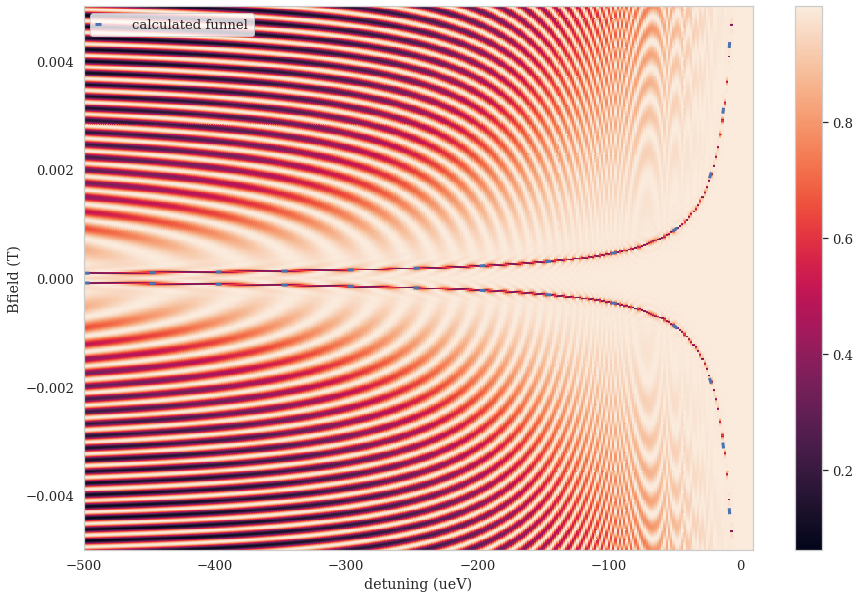

In [20]:
# FIX THE EVOLUTION TIME AND CHECK THE SINGLET RETURN PROBABILITY FOR VARIOUS VALUES OF B-FIELD AND DETUNING
# WE ALSO CALCULATE THE FUNNEL AND PLOT IT IN THE SAME GRAPH

t=np.array(250e-9)

# big picture
pS_fin = []
Bfield = np.linspace(0,5e-3,301)
detuning = np.linspace(-500,10,301)*1e-6

# singlet return probability
for d in detuning:
    for B in Bfield:
        pS_fin.append(Rabi(t,d=d,B=B,c=constants,so=so))

pS_fin = np.array(pS_fin).reshape((len(detuning),len(Bfield)))

# having checked that it is indeed symmetric in B, we save calculation speed:
pS_fin_sym = np.concatenate((pS_fin.T[::-1], pS_fin.T))
Bfield_sym = np.concatenate((Bfield[::-1],-Bfield))

fig,ax = plt.subplots(1,figsize=(15,10))
pic = ax.pcolormesh(detuning*1e6,Bfield_sym,pS_fin_sym)
fig.colorbar(pic,ax=ax)

# funnel
E_S, E_T0,x,x = energies(d=detuning,B=0,c=constants) # B doesn't matter; we are only interested in E_S, E_T0
J = (E_T0 - E_S)
ax.plot(detuning*1e6,J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')
ax.plot(detuning*1e6,-J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1],labels[:1],loc=0)

ax.set_xlabel('detuning (ueV)')
ax.set_ylabel('Bfield (T)')
ax.set_ylim(-np.max(Bfield),np.max(Bfield))

__Note__: The funnel appears where we expected it to appear.

<a name="chapter2-2"></a>

## Play with SO

Ok, let's cranck up the spin-orbit interaction!

In [21]:
so = 100e-9 #eV

(-0.001, 0.001)

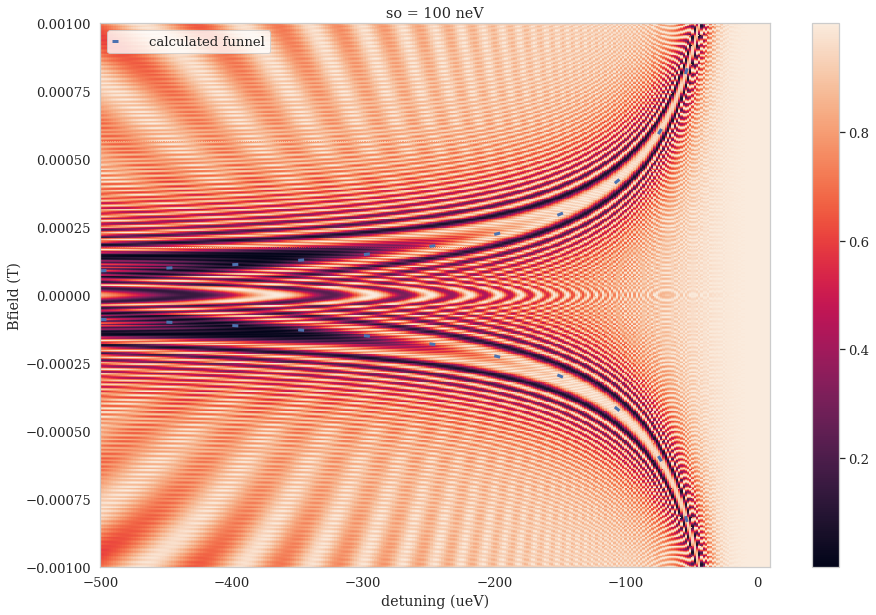

In [22]:
# FIX THE EVOLUTION TIME AND CHECK THE SINGLET RETURN PROBABILITY FOR VARIOUS VALUES OF B-FIELD AND DETUNING
# WE ALSO CALCULATE THE FUNNEL AND PLOT IT IN THE SAME GRAPH

t=np.array(250e-9)

# big picture
pS_fin = []
Bfield = np.linspace(0,1e-3,301)
detuning = np.linspace(-500,10,301)*1e-6

# singlet return probability
for d in detuning:
    for B in Bfield:
        pS_fin.append(Rabi(t,d=d,B=B,c=constants,so=so))

pS_fin = np.array(pS_fin).reshape((len(detuning),len(Bfield)))

# having checked that it is indeed symmetric in B, we save calculation speed:
pS_fin_sym = np.concatenate((pS_fin.T[::-1], pS_fin.T))
Bfield_sym = np.concatenate((Bfield[::-1],-Bfield))

fig,ax = plt.subplots(1,figsize=(15,10))
pic = ax.pcolormesh(detuning*1e6,Bfield_sym,pS_fin_sym)
fig.colorbar(pic,ax=ax)

# funnel
E_S, E_T0,x,x = energies(d=detuning,B=0,c=constants) # B doesn't matter; we are only interested in E_S, E_T0
J = (E_T0 - E_S)
ax.plot(detuning*1e6,J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')
ax.plot(detuning*1e6,-J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1],labels[:1],loc=0)

ax.title.set_text('so = 100 neV')
ax.set_xlabel('detuning (ueV)')
ax.set_ylabel('Bfield (T)')
ax.set_ylim(-np.max(Bfield),np.max(Bfield))

In [23]:
so = 300e-9 # eV

(-0.001, 0.001)

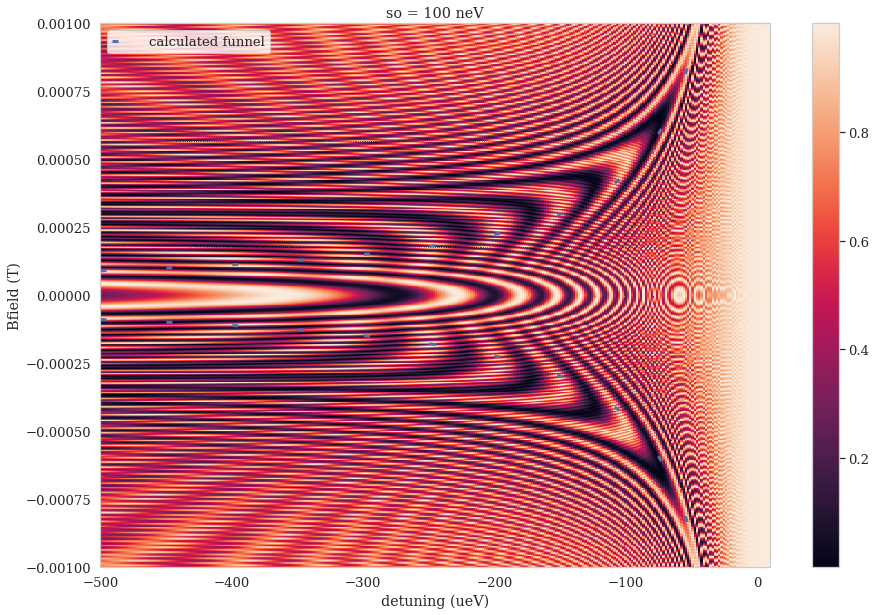

In [24]:
# FIX THE EVOLUTION TIME AND CHECK THE SINGLET RETURN PROBABILITY FOR VARIOUS VALUES OF B-FIELD AND DETUNING
# WE ALSO CALCULATE THE FUNNEL AND PLOT IT IN THE SAME GRAPH

t=np.array(250e-9)

# big picture
pS_fin = []
Bfield = np.linspace(0,1e-3,301)
detuning = np.linspace(-500,10,301)*1e-6

# singlet return probability
for d in detuning:
    for B in Bfield:
        pS_fin.append(Rabi(t,d=d,B=B,c=constants,so=so))

pS_fin = np.array(pS_fin).reshape((len(detuning),len(Bfield)))

# having checked that it is indeed symmetric in B, we save calculation speed:
pS_fin_sym = np.concatenate((pS_fin.T[::-1], pS_fin.T))
Bfield_sym = np.concatenate((Bfield[::-1],-Bfield))

fig,ax = plt.subplots(1,figsize=(15,10))
pic = ax.pcolormesh(detuning*1e6,Bfield_sym,pS_fin_sym)
fig.colorbar(pic,ax=ax)

# funnel
E_S, E_T0,x,x = energies(d=detuning,B=0,c=constants) # B doesn't matter; we are only interested in E_S, E_T0
J = (E_T0 - E_S)
ax.plot(detuning*1e6,J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')
ax.plot(detuning*1e6,-J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1],labels[:1],loc=0)

ax.title.set_text('so = 100 neV')
ax.set_xlabel('detuning (ueV)')
ax.set_ylabel('Bfield (T)')
ax.set_ylim(-np.max(Bfield),np.max(Bfield))

In [25]:
so = 1e-6 # eV

(-0.001, 0.001)

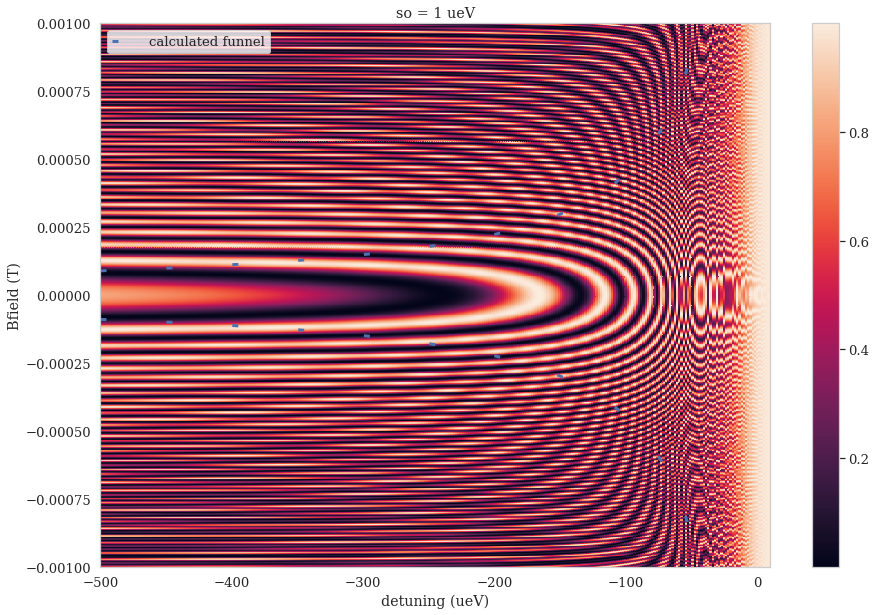

In [26]:
# FIX THE EVOLUTION TIME AND CHECK THE SINGLET RETURN PROBABILITY FOR VARIOUS VALUES OF B-FIELD AND DETUNING
# WE ALSO CALCULATE THE FUNNEL AND PLOT IT IN THE SAME GRAPH

t=np.array(250e-9)

# big picture
pS_fin = []
Bfield = np.linspace(0,1e-3,301)
detuning = np.linspace(-500,10,301)*1e-6

# singlet return probability
for d in detuning:
    for B in Bfield:
        pS_fin.append(Rabi(t,d=d,B=B,c=constants,so=so))

pS_fin = np.array(pS_fin).reshape((len(detuning),len(Bfield)))

# having checked that it is indeed symmetric in B, we save calculation speed:
pS_fin_sym = np.concatenate((pS_fin.T[::-1], pS_fin.T))
Bfield_sym = np.concatenate((Bfield[::-1],-Bfield))

fig,ax = plt.subplots(1,figsize=(15,10))
pic = ax.pcolormesh(detuning*1e6,Bfield_sym,pS_fin_sym)
fig.colorbar(pic,ax=ax)

# funnel
E_S, E_T0,x,x = energies(d=detuning,B=0,c=constants) # B doesn't matter; we are only interested in E_S, E_T0
J = (E_T0 - E_S)
ax.plot(detuning*1e6,J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')
ax.plot(detuning*1e6,-J/(g1*muB+g2*muB),color='C0',linestyle=(0,(2,20)),linewidth=3,label='calculated funnel')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1],labels[:1],loc=0)

ax.title.set_text('so = 1 ueV')
ax.set_xlabel('detuning (ueV)')
ax.set_ylabel('Bfield (T)')
ax.set_ylim(-np.max(Bfield),np.max(Bfield))